In [1]:
import numpy as np
import pandas as pd

In [2]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 머신러닝
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
test_df = pd.read_csv("data/test.csv")
train_df = pd.read_csv("data/train.csv")

In [6]:
#칼럼명
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


survival : 생존여부 (0 : 사망, 1 : 생존)

Pclass : 티켓 클래스 ( 1 : 1등급, 2 : 2등급, 3 : 3등급)

sex : 성별 (male, female) -> 추후 0,1

SibSp : 타이타닉호에 탑승한 형제/배우자 (0,1,2,3,4,5,8)

Parch : 타이타닉호에 탑승한 부모/ 자녀 수

ticket : 티켓 번호

fare : 가격

Cabin : 객실번호

Embarked : 승선항 ( C = Cherbourg, Q = Queenstown, S = Southampton)

생각해본 분석 방법들

1. 성별에 따른 생존 여부
2. 나이에 따른 생존 여부
3. 성별 및 나이에 따른 생존 여부
4. 티켓 클래스에 따른 생존 여부
5. 승선항에 따른 생존여부
6. 객실번호에 따른 생존여부
7. 동행자들의 수에 따른 생존여부

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


생존율 : 38.4%

# 성별에 따른 생존율

In [9]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


생존여부 여성 > 남성

# 나이에 따른 생존 여부

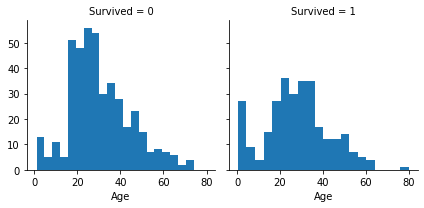

In [10]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

4세 이하의 유아의 생존율이 높다.

현재 차트에선 15세 ~35세의 생존율이 높지만 동시에 사망자 수도 많다.

In [11]:
train_df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

연령대 별로 나누고 그걸 또 테스트

10대 미만 : 0

10대 : 10

.
.
.

50대 : 50

60살 이상 : 60

In [12]:
train_df['Age'].fillna(value=train_df['Age'].mean(), inplace=True)

In [13]:
label = [0,10,20,30,40,50]
train_df['AgeGroup'] = pd.cut(train_df['Age'], 6, labels=label) 
train_df['AgeGroup'].unique()

[10, 20, 40, 0, 30, 50]
Categories (6, int64): [0 < 10 < 20 < 30 < 40 < 50]

In [14]:
train_df['AgeGroup']

0      10
1      20
2      10
3      20
4      20
       ..
886    20
887    10
888    20
889    10
890    20
Name: AgeGroup, Length: 891, dtype: category
Categories (6, int64): [0 < 10 < 20 < 30 < 40 < 50]

In [15]:
train_df.groupby('AgeGroup').size()

AgeGroup
0      71
10    248
20    422
30    100
40     43
50      7
dtype: int64

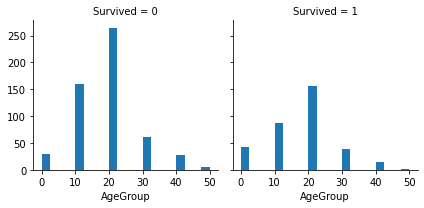

In [16]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'AgeGroup', bins=20)

연령대별 생존 차트

In [17]:
train_df.groupby('AgeGroup').mean().sort_values(by='Survived', ascending=False)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
AgeGroup,,,,,,,
0,437.549296,0.591549,2.633803,5.002394,1.816901,1.380282,31.024472
30,488.830000,0.390000,1.880000,46.240000,0.380000,0.400000,41.011962
20,444.485782,0.372038,2.348341,31.428303,0.431280,0.255924,30.295396
10,438.540323,0.354839,2.479839,20.903226,0.431452,0.314516,29.741179
40,406.883721,0.348837,1.488372,58.825581,0.209302,0.348837,46.938660
50,515.714286,0.142857,1.714286,72.357143,0.142857,0.142857,30.169057


In [18]:
train_df.groupby('AgeGroup').mean().sort_values(by='Survived', ascending=False)['Survived'].sort_index() * 100

AgeGroup
0     59.154930
10    35.483871
20    37.203791
30    39.000000
40    34.883721
50    14.285714
Name: Survived, dtype: float64

연령대별 생존율은

10세 미만 > 30대 > 50대 > 10대 > 40대 > 20대 였다

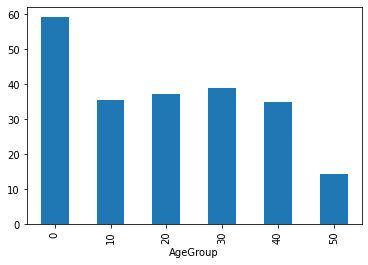

In [19]:
plt = (train_df.groupby('AgeGroup').mean().sort_values(by='Survived', ascending=False)['Survived'].sort_index() * 100).plot.bar()

연령대별 생존자 / 연령대별 인구 의 비율

# 성별 및 나이에 따른 생존 여부

<AxesSubplot:xlabel='AgeGroup,Sex'>

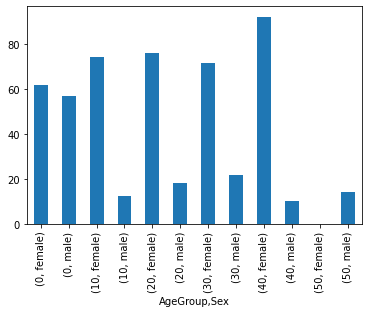

In [20]:
(train_df.groupby(['AgeGroup', 'Sex']).mean().sort_values(by='AgeGroup', ascending=False)['Survived'].sort_index() * 100).plot.bar()

10대 미만은 남녀 구분없이 생존율이 높고

10대 이상부터는 여성이 압도적으로 생존율이 높다.

# 티켓 클래스에 따른 생존 여부

<AxesSubplot:xlabel='Pclass,Sex'>

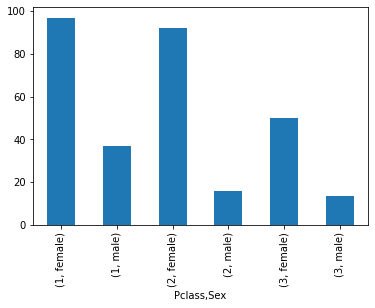

In [21]:
(train_df.groupby(['Pclass', 'Sex']).mean().sort_values(by='Pclass', ascending=False)['Survived'].sort_index() * 100).plot.bar()

생존율 : 1등급 > 2등급 > 3등급

# 승선항에 따른 생존여부

<AxesSubplot:xlabel='Embarked'>

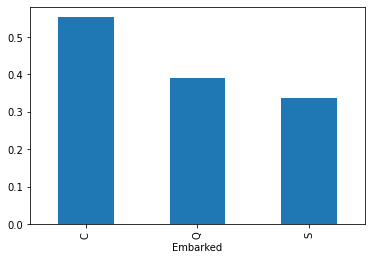

In [22]:
train_df.groupby('Embarked').mean().sort_values(by='Embarked', ascending=False)['Survived'].sort_index().plot.bar()

C = Cherbourg, Q = Queenstown, S = Southampton 순으로 생존율이 높다.

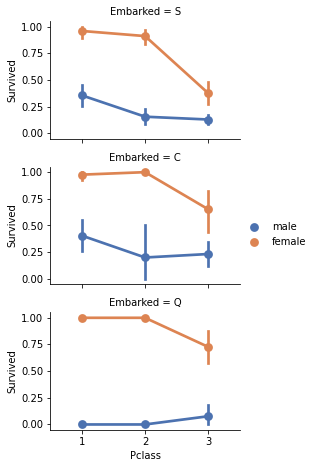

In [23]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order = [1, 2, 3], hue_order = ["male", "female"])
grid.add_legend()

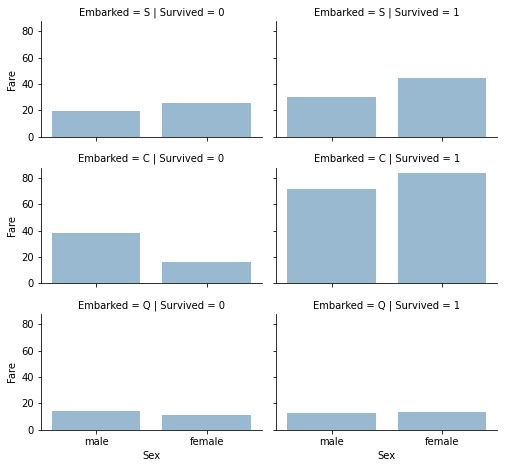

In [24]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None,order=["male","female"])
grid.add_legend()

# 객실번호에 따른 생존여부

In [25]:
train_df['Cabin_class'] = train_df['Cabin'].str.get(0)
train_df['Cabin_class'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

<AxesSubplot:xlabel='Cabin_class,Sex'>

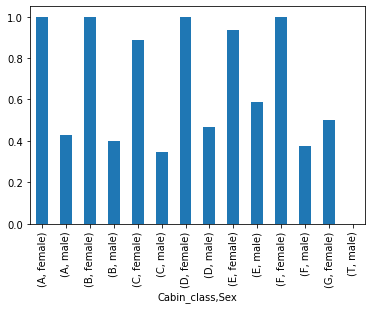

In [26]:
train_df.groupby(['Cabin_class', 'Sex']).mean().sort_values(by='Cabin_class', ascending=False)['Survived'].sort_index().plot.bar()

처음 생각했을때는 객실이 출구에 가까울수록 생존율이 높을것이라는 생각을 하였지만 큰 의미는 없어 보인다.

# 동행자들의 수에 따른 생존여부

In [27]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False).sort_index()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [28]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False).sort_index()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


동행하는 사람이 많을수록 생존율을 떨어졌다.?

# 데이터 학습 준비

데이터 전처리를 위한 작업

1. 생존율에 영향이 큰것같은 성별, 나이, 티켓 클래스를 위주로 선택한다.
2. 문자열을 숫자로 변환

    2.1 남성을 0, 여성을 1로 변환
    
    2.2 나이의 경우 공백이 많아 평균값으로 대체
    
    2.3 승선지 변경
        'C': 0, 'Q': 1, 'S':2
        NaN 값의 경우 수가 제일 많은 'C'로 변경
    
    
3. 안쓸 변수 제거 (PassengerId, Name, Ticket, Cabin)

In [29]:
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Cabin_class'], axis=1)

In [30]:
train_df['Sex'] = train_df['Sex'].map({'male' : 0, 'female' : 1})
train_df['Embarked'] = train_df['Embarked'].map({'C': 0, 'Q': 1, 'S':2})
train_df['Embarked'].fillna(0, inplace=True)

In [31]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,0,3,0,22.0,1,0,7.2500,2.0,10
1,1,1,1,38.0,1,0,71.2833,0.0,20
2,1,3,1,26.0,0,0,7.9250,2.0,10
3,1,1,1,35.0,1,0,53.1000,2.0,20
4,0,3,0,35.0,0,0,8.0500,2.0,20


In [32]:
test_df['Fare'].fillna(value=test_df['Fare'].mean(), inplace=True)

In [33]:
test_df['Sex'] = test_df['Sex'].map({'male' : 0, 'female' : 1})


In [34]:
test_df = test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_df['Embarked'] = test_df['Embarked'].map({'C': 0, 'Q': 1, 'S':2})
test_df['Age'].fillna(value=test_df['Age'].mean(), inplace=True)
label = [0,10,20,30,40,50]
test_df['AgeGroup'] = pd.cut(train_df['Age'], 6, labels=label) 
test_df['AgeGroup'].unique()

[10, 20, 40, 0, 30, 50]
Categories (6, int64): [0 < 10 < 20 < 30 < 40 < 50]

In [35]:
# 목적 변수 제거
X_train = train_df.drop("Survived", axis=1)
#목적 변수 역할
Y_train = train_df["Survived"]
#예측 대상 데이터 셋
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [36]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.02